## Лабораторная работа №5

### Тарасенко Андрей, БПМ161, Вариант 23

#### Задание 5.1.23

Функция $y = f(x)$ задана таблицей значений $y_{0}, y_{1}, \ldots, y_{n}$ в точках $x_{0}, x_{1}, \ldots, x_{n}$. Используя метод
наименьших квадратов (МНК), найти многочлен $P_{m}(x) = a_{0} + a_{1}x + \ldots + a_{m}x^m$ наилучшего среднеквадратичного приближения оптимальной степени $m = m^*$. За оптимальное значение $m^*$ принять ту
степень многочлена, начиная с которой величина $\sigma_{m} = \sqrt{\frac{1}{n - m} \sum_{k = 0}^{n} (P_{m}(x_{k}) - y_{k})^2}$ стабилизируется или начинает возрастать. 

In [27]:
import numpy as np
import matplotlib.pyplot as plt

In [28]:
#Зададим исходные векторы x и y
x = np.array([-0.5, -0.42, -0.33, -0.25, -0.17, -0.08, 0, 0.08, 0.17, 0.25, 0.33, 0.42, 0.5])
y = np.array([0.061, 4.185, 7.271, 9.683, 11.319, 11.469, 11.324, 10.495, 9.659, 7.345, 5.132, 2.619, 0.069])

In [29]:
#Реализуем МНК
def MNK(x, y, m):
     mat = np.array([[xj**j for j in range(m + 1)] for xj in x])
     return np.linalg.solve(mat.T.dot(mat), mat.T.dot(y))

In [30]:
#Реализуем вычисление многочленов P_m
def Pm(x, a):
    return [np.sum(xj**np.arange(len(a)) * a) for xj in x]

In [31]:
#Найдем sigmas
coef = []
M = 10
for m in range(M):
    a = MNK(x, y, m)
    coef.append(a)
    
sigmas = [np.sqrt(np.sum((Pm(x, a) - y)**2) / (y.shape[0] - a.shape[0])) for a in coef]

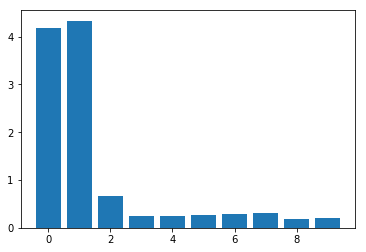

In [32]:
#Построим гистограмму
plt.bar(np.arange(10), sigmas)
plt.show()

In [33]:
#Из гистограммы видно, что сигмы стабилизируются начиная с m = 3, следовательно m* = 3

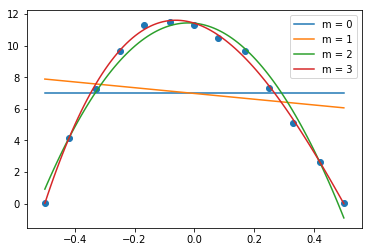

In [34]:
#Построим графики многочленов P_m до m* = 3 и исходную функцию
M = 3
coef = []
plt.scatter(x, y)
X = np.linspace(min(x), max(x), 100)
for m in range(M+1):
    a = MNK(x, y, m)
    ym = Pm(X, a)
    plt.plot(X, ym, label = 'm = ' + str(m))
plt.legend()
plt.show()

#### Задание 5.5.4

Известно, что $y = c_{1} sin(a\pi x) + c_{2} cos(b\pi x)$, где коэффициенты $c_{1}$ и $c_{2}$ подлежат определению.
Используя метод наименьших квадратов, определить $c_{1}$ и $c_{2}$. 

In [35]:
#Дано
a = 3
b = 4
x = np.array([-1 + 0.1 * k for k in range(0, 21)])
y = np.array([0.1931, 1.242, 1.7388, 1.7317, 1.2585, 0.1876, -1.1307, -2.0600, -2.0782, 
              -1.1179, 0.2087, 1.2317, 1.7312, 1.7316, 1.2483, 0.1898, -1.1263, -2.0577, -2.0713, -1.1084, 0.2066])
def f1(x):
    return np.sin(a * np.pi * x)

def f2(x):
    return np.cos(b * np.pi * x)

In [36]:
#Найдем c1 и c2 по МНК
first = np.array([f1(xj) for xj in x])
second = np.array([f2(xj) for xj in x])
ar = np.column_stack((first, second))
print(ar)

[[-3.67394040e-16  1.00000000e+00]
 [-8.09016994e-01  3.09016994e-01]
 [-9.51056516e-01 -8.09016994e-01]
 [-3.09016994e-01 -8.09016994e-01]
 [ 5.87785252e-01  3.09016994e-01]
 [ 1.00000000e+00  1.00000000e+00]
 [ 5.87785252e-01  3.09016994e-01]
 [-3.09016994e-01 -8.09016994e-01]
 [-9.51056516e-01 -8.09016994e-01]
 [-8.09016994e-01  3.09016994e-01]
 [ 0.00000000e+00  1.00000000e+00]
 [ 8.09016994e-01  3.09016994e-01]
 [ 9.51056516e-01 -8.09016994e-01]
 [ 3.09016994e-01 -8.09016994e-01]
 [-5.87785252e-01  3.09016994e-01]
 [-1.00000000e+00  1.00000000e+00]
 [-5.87785252e-01  3.09016994e-01]
 [ 3.09016994e-01 -8.09016994e-01]
 [ 9.51056516e-01 -8.09016994e-01]
 [ 8.09016994e-01  3.09016994e-01]
 [ 3.67394040e-16  1.00000000e+00]]


In [37]:
def newMNK(mat, y):
     return np.linalg.solve(mat.T.dot(mat), mat.T.dot(y))
    
coef = newMNK(ar, y)
print(coef)

[5.76038694e-05 2.01690093e-01]
